## 네이버 영화 랭킹 사이트 접속
- https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20220914
- 영화제목과 평점 가져오기

In [1]:
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
import urllib.request

url_base='https://movie.naver.com/'
url_sub='movie/sdb/rank/rmovie.naver?sel=cur&date=20220914'
url=url_base+url_sub

headers={'User-Agent':'Chrome/66.0.3359.181'}
req=urllib.request.Request(url,headers=headers)
html=urllib.request.urlopen(req)
soup=BeautifulSoup(html,'html.parser')

soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20220914" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/

In [3]:
soup.find_all('div','tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=213364" title="인생은 뷰티풀: 비타돌체">인생은 뷰티풀: 비타돌체</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=81888" title="탑건: 매버릭">탑건: 매버릭</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=217719" title="명탐정 코난: 할로윈의 신부">명탐정 코난: 할로윈의 신부</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=163788" title="알라딘">알라딘</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10670" title="천녀유혼">천녀유혼</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=213733" title="극장판 주술회전 0">극장판 주술회전 0</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10058" title="벤허">벤허</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=172174" title="어느 가족">어느 가족</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=201073" title="코다">코다</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=18

In [4]:
soup.find_all('div','tit5')[0].a.string

'인생은 뷰티풀: 비타돌체'

In [5]:
soup.find_all('td','point')[0].string

'9.79'

In [6]:
date=pd.date_range('2022-1-1',periods=100,freq='D')
date

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01',
               '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
               '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
               '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
      

In [7]:
import urllib.request
import urllib.parse
from tqdm import tqdm

In [8]:
movie_date=[]
movie_name=[]
movie_point=[]

for today in tqdm(date):
    url_base='https://movie.naver.com/'
    url_sub='movie/sdb/rank/rmovie.naver?sel=cur&date='+today.strftime('%Y%m%d')
    url=url_base+url_sub

    headers={'User-Agent':'Chrome/66.0.3359.181'}
    req=urllib.request.Request(url,headers=headers)
    html=urllib.request.urlopen(req)
    soup=BeautifulSoup(html,'html.parser')
    
    end=len(soup.find_all('td','point'))
    
    movie_date.extend([today for n in range(0,end)])
    movie_name.extend([soup.find_all('div','tit5')[n].a.string for n in range(0,end)])
    movie_point.extend([soup.find_all('td','point')[n].string for n in range(0,end)])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.12it/s]


In [9]:
movie=pd.DataFrame({'date':movie_date,
                   'name':movie_name,
                   'point':movie_point})
movie.head()

,date,name,point
0,2022-01-01,코다,9.24
1,2022-01-01,스파이더맨: 노 웨이 홈,8.97
2,2022-01-01,러브 액츄얼리,8.93
3,2022-01-01,아멜리에,8.81
4,2022-01-01,고양이를 부탁해,8.81


In [10]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2514 non-null   datetime64[ns]
 1   name    2514 non-null   object        
 2   point   2514 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 59.0+ KB


In [15]:
import numpy as np

movie['point']=pd.to_numeric(movie['point'])

In [16]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2514 non-null   datetime64[ns]
 1   name    2514 non-null   object        
 2   point   2514 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 59.0+ KB


In [17]:
movie_unique=pd.pivot_table(movie,index=['name'],aggfunc=np.sum)
movie_best=movie_unique.sort_values(by='point',ascending=False)

movie_best.head()

,point
name,
씽2게더,894.97
스파이더맨: 노 웨이 홈,887.49
드라이브 마이 카,812.60
코다,690.29
킹메이커,556.85


In [21]:
tmp=movie.query('name == ["스파이더맨: 노 웨이 홈"]')
tmp

,date,name,point
1,2022-01-01,스파이더맨: 노 웨이 홈,8.97
20,2022-01-02,스파이더맨: 노 웨이 홈,8.96
38,2022-01-03,스파이더맨: 노 웨이 홈,8.95
57,2022-01-04,스파이더맨: 노 웨이 홈,8.95
76,2022-01-05,스파이더맨: 노 웨이 홈,8.95
...,...,...,...
2377,2022-04-06,스파이더맨: 노 웨이 홈,8.82
2405,2022-04-07,스파이더맨: 노 웨이 홈,8.82
2434,2022-04-08,스파이더맨: 노 웨이 홈,8.82
2462,2022-04-09,스파이더맨: 노 웨이 홈,8.82


No handles with labels found to put in legend.


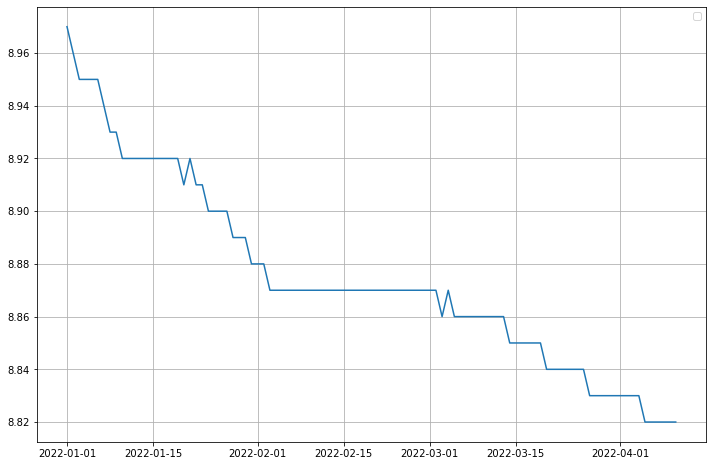

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'],tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [30]:
movie_pivot=pd.pivot_table(movie,index=['date'],columns=['name'],values=['point'])

movie_pivot.head()

point                                                     \
name         355 가나의 혼인잔치: 언약 경관의 피 고양이를 부탁해 공각기동대 광대: 소리꾼  귀향 그녀에게   
date                                                                  
2022-01-01   NaN          NaN   NaN     8.81  8.73     NaN NaN  NaN   
2022-01-02   NaN          NaN   NaN      NaN  8.73     NaN NaN  NaN   
2022-01-03   NaN          NaN   NaN     8.81  8.73     NaN NaN  NaN   
2022-01-04   NaN          NaN   NaN     8.81  8.73     NaN NaN  NaN   
2022-01-05   NaN          NaN  8.18     8.81  8.73     NaN NaN  NaN   

                                ...                              \
name       극장판 주술회전 0 기쿠지로의 여름  ... 프렌치 디스패치 하나-비 하우스 오브 구찌 한공주   
date                            ...                               
2022-01-01        NaN      NaN  ...     8.02  NaN       NaN NaN   
2022-01-02        NaN      NaN  ...     8.02  NaN       NaN NaN   
2022-01-03        NaN      NaN  ...     8.01  NaN       NaN NaN   
2022-01-04        NaN      NaN  ...     8.01  NaN       NaN NaN   
2022-01-05        NaN      NaN  ...     8.01  NaN       NaN NaN   

                                                                
name       해리 포터와 불사조 기사단 해적: 도깨비 깃발 해피 뉴 이어 해피 투게더 화양연화 환상의 빛  
date                                                            
2022-01-01            NaN        NaN    7.21    NaN  NaN   NaN  
2022-01-02            NaN        NaN    7.14    NaN  NaN   NaN  
2022-01-03            NaN        NaN    7.11    NaN  NaN   NaN  
2022-01-04            NaN        NaN    7.08    NaN  NaN   NaN  
2022-01-05            NaN        NaN    7.10    NaN  NaN   NaN  

[5 rows x 95 columns]

In [32]:
movie_pivot.columns=movie_pivot.columns.droplevel()
movie_pivot.head()

name,355,가나의 혼인잔치: 언약,경관의 피,고양이를 부탁해,공각기동대,광대: 소리꾼,귀향,그녀에게,극장판 주술회전 0,기쿠지로의 여름,...,프렌치 디스패치,하나-비,하우스 오브 구찌,한공주,해리 포터와 불사조 기사단,해적: 도깨비 깃발,해피 뉴 이어,해피 투게더,화양연화,환상의 빛
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,NaN,NaN,NaN,8.81,8.73,NaN,NaN,NaN,NaN,NaN,...,8.02,NaN,NaN,NaN,NaN,NaN,7.21,NaN,NaN,NaN
2022-01-02,NaN,NaN,NaN,NaN,8.73,NaN,NaN,NaN,NaN,NaN,...,8.02,NaN,NaN,NaN,NaN,NaN,7.14,NaN,NaN,NaN
2022-01-03,NaN,NaN,NaN,8.81,8.73,NaN,NaN,NaN,NaN,NaN,...,8.01,NaN,NaN,NaN,NaN,NaN,7.11,NaN,NaN,NaN
2022-01-04,NaN,NaN,NaN,8.81,8.73,NaN,NaN,NaN,NaN,NaN,...,8.01,NaN,NaN,NaN,NaN,NaN,7.08,NaN,NaN,NaN
2022-01-05,NaN,NaN,8.18,8.81,8.73,NaN,NaN,NaN,NaN,NaN,...,8.01,NaN,NaN,NaN,NaN,NaN,7.10,NaN,NaN,NaN


In [33]:
import platform
path='c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

if platform.system()=='Darwin':
    rc('font',family='AppleGothic')
elif platform.system()=='Windows':
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system')

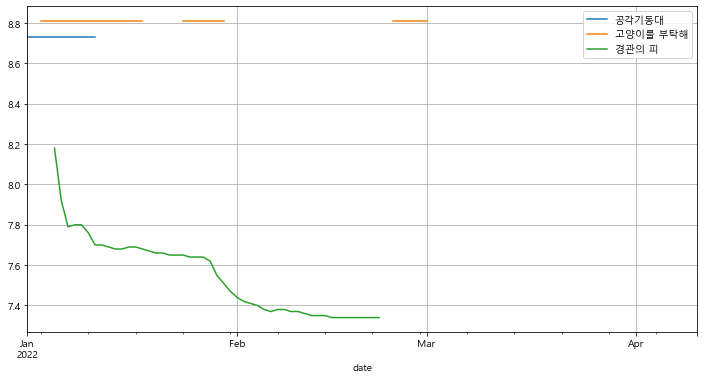

In [35]:
movie_pivot.plot(y=['공각기동대','고양이를 부탁해','경관의 피'],figsize=(12,6))
plt.legend(loc='best')
plt.grid()
plt.show()